# Box Counting Tests and Applications

In [3]:
# Algorithm
import numpy as np


def get_limit(lower, upper, box_size):
    d = upper - lower
    rest = d % box_size
    # needs to be above stop
    # because of np.arange([start, stop)) open interval
    overhang = box_size * 1e-1
    return [lower, upper + box_size - rest + overhang]
    

def count_boxes(points, box_size):
    
    # get limits in each dimension
    limits = np.asarray([[np.amin(coords_i), np.amax(coords_i)]for coords_i in np.transpose(points)])
    # modify upper limits based on box_side
    limits = [get_limit(lower, upper, box_size) for lower, upper in limits]    
    H, edges = np.histogramdd(points, bins=tuple(np.arange(start, stop, box_size) \
                                            for start, stop in limits))
    count = np.sum(H > 0)
    return count


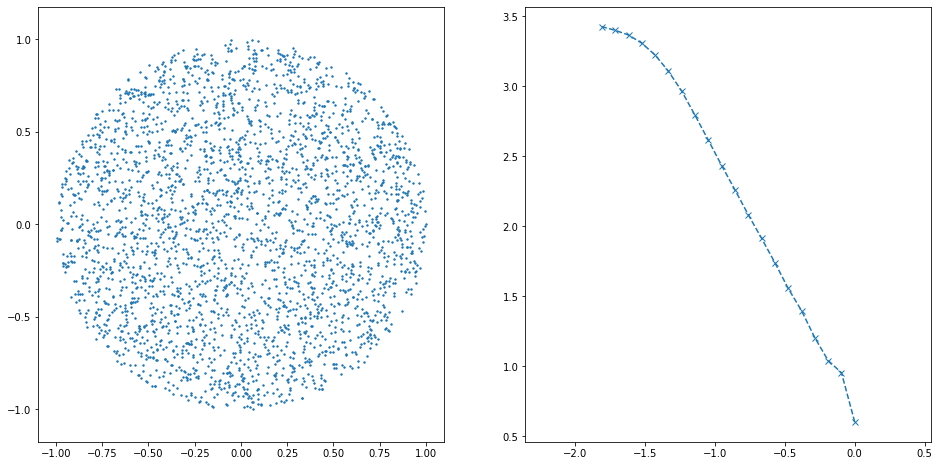

In [4]:
import matplotlib.pyplot as plt

#m_points = np.random.rand(30000, 2)
N = 3000
phi = np.random.rand(N) * 2. * np.pi
m_points = np.multiply(np.tile(np.random.rand(N)**0.5, (2, 1)).transpose(), np.array([np.cos(phi), np.sin(phi)]).transpose())
eps = np.logspace(np.log10(1.), np.log10(1./2**6), 20)
counts = np.array([count_boxes(m_points, epsi) for epsi in eps])

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].scatter(m_points[:, 0], m_points[:, 1], s=2)
ax[1].plot(np.log10(eps), np.log10(counts), 'x--')
ax[1].axis('equal')
ax[0].axis('equal')
plt.show()

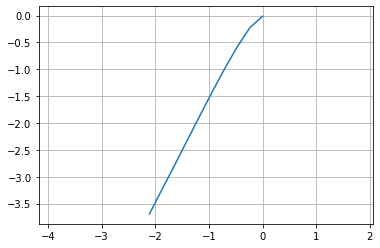

In [5]:
from scipy.spatial.distance import pdist


def grass_procaccia(N, locs, r):
    if N > 15000:
        raise Exception('Potential Mem Overload!')
    # Corr(r) = 2 / N (N-1) * Sum_i<j (Theta( r - d_ij ))
    pair_distances = pdist(locs)
    count = np.sum(np.heaviside(r - pair_distances, np.ones(int(N*(N-1)/2))))
    return 2.0 * count / (N*(N - 1))

N = 3000
m_points = np.random.rand(N, 2)
eps = np.logspace(np.log10(1.), np.log10(1./2**7), 10)
helper = lambda r: grass_procaccia(N, m_points, r)
vec_procaccia = np.vectorize(helper)
corr_dim = vec_procaccia(eps)
    
plt.figure()
plt.plot(np.log10(eps), np.log10(corr_dim))
plt.axis('equal')
plt.grid(True)
plt.show()

Fit results: m=-0.85, y0=1.01


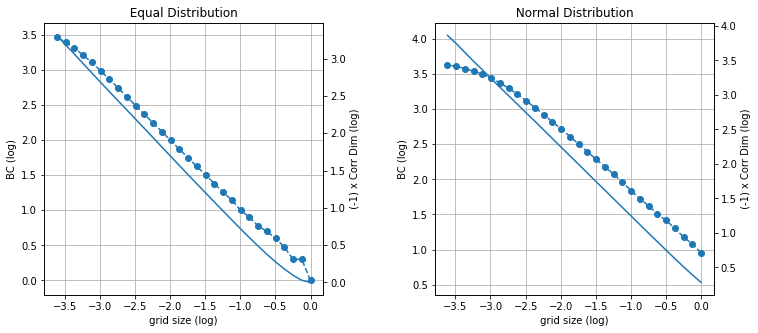

In [285]:
# 1D box counting
points = np.random.rand(5000, 1)
scales = np.logspace(np.log10(1), np.log10(1./2**12), 30)

helper = lambda scale: count_boxes(points, scale)
count_boxes_vect = np.vectorize(helper)
counts = count_boxes_vect(scales)

points_normal = np.random.normal(size=(5000, 1))
helper_normal = lambda scale: count_boxes(points_normal, scale)
count_boxes_vect = np.vectorize(helper_normal)
counts_normal = count_boxes_vect(scales)

m, y0 = np.polyfit(np.log10(scales[6:-7]), np.log10(counts_normal[6:-7]), deg=1)
print(f'Fit results: {m=:.2f}, {y0=:.2f}')

N = points.size
helper = lambda r: grass_procaccia(N, points, r)
grass_procaccia_vect = np.vectorize(helper)
corr_dim = grass_procaccia_vect(scales)

helper_normal = lambda r: grass_procaccia(N, points_normal, r)
grass_procaccia_vect = np.vectorize(helper_normal)
corr_dim_normal = grass_procaccia_vect(scales)

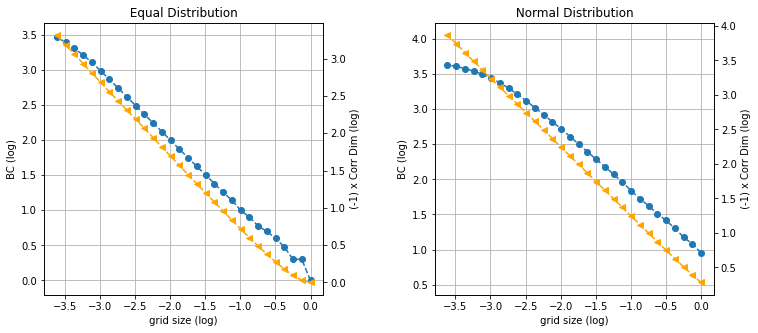

In [290]:
# Visualization
# -------------------------------------------------------------------------------

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.4)
for a in ax: 
    a.grid(True)
    a.set_xlabel(' grid size (log) ')
    a.set_ylabel(' BC (log) ')
    a.axis('equal')
ax[0].plot(np.log10(scales), np.log10(counts), 'o--')
ax[1].plot(np.log10(scales), np.log10(counts_normal), 'o--')

b = ax[0].twinx()
b.set_ylabel(' (-1) x Corr Dim (log) ')
b.plot(np.log10(scales), -np.log10(corr_dim), '<--', color='orange')

b2 = ax[1].twinx()
b2.set_ylabel(' (-1) x Corr Dim (log) ')
b2.plot(np.log10(scales), -np.log10(corr_dim_normal), '<--', color='orange')

ax[0].set_title(' Equal Distribution ')
ax[1].set_title(' Normal Distribution ')
plt.show()

In [309]:
# 2D
N = 5000
points = np.random.rand(N, 2)
scales = np.logspace(np.log10(1), np.log10(1./2**12), 30)

helper = lambda scale: count_boxes(points, scale)
count_boxes_vect = np.vectorize(helper)
counts = count_boxes_vect(scales)

points_normal = np.random.normal(size=(N, 2))
helper_normal = lambda scale: count_boxes(points_normal, scale)
count_boxes_vect = np.vectorize(helper_normal)
counts_normal = count_boxes_vect(scales)

m, y0 = np.polyfit(np.log10(scales[6:-7]), np.log10(counts_normal[6:-7]), deg=1)
print(f'Fit results: {m=:.2f}, {y0=:.2f}')

helper = lambda r: grass_procaccia(N, points, r)
grass_procaccia_vect = np.vectorize(helper)
corr_dim = grass_procaccia_vect(scales)

helper_normal = lambda r: grass_procaccia(N, points_normal, r)
grass_procaccia_vect = np.vectorize(helper_normal)
corr_dim_normal = grass_procaccia_vect(scales)

Fit results: m=-0.34, y0=2.94


C:\Users\hoedtke\AppData\Local\Temp/ipykernel_18852/2273582859.py:21: RuntimeWarning: divide by zero encountered in log10
  b2.plot(np.log10(scales), -np.log10(corr_dim_normal), '<--', color='orange')


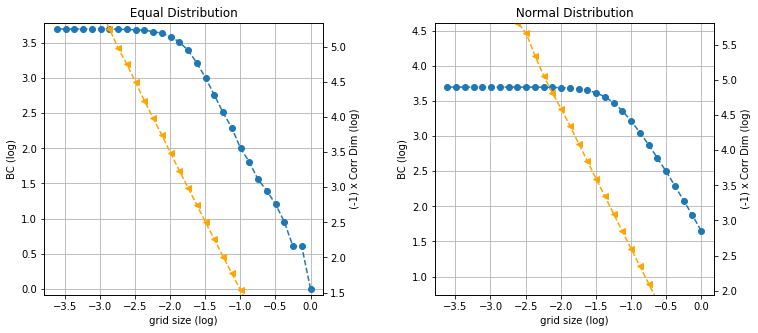

In [311]:
# Visualization
# -------------------------------------------------------------------------------

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.4)
for a in ax: 
    a.grid(True)
    a.set_xlabel(' grid size (log) ')
    a.set_ylabel(' BC (log) ')
    a.axis('equal')
ax[0].plot(np.log10(scales), np.log10(counts), 'o--')
ax[1].plot(np.log10(scales), np.log10(counts_normal), 'o--')

b = ax[0].twinx()
b.set_ylabel(' (-1) x Corr Dim (log) ')
b.plot(np.log10(scales), -np.log10(corr_dim), '<--', color='orange')
b.axis('equal')

b2 = ax[1].twinx()
b2.set_ylabel(' (-1) x Corr Dim (log) ')
b2.plot(np.log10(scales), -np.log10(corr_dim_normal), '<--', color='orange')
b2.axis('equal')

ax[0].set_title(' Equal Distribution ')
ax[1].set_title(' Normal Distribution ')
plt.show()

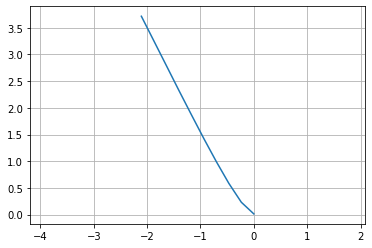

In [305]:
N = 3000
m_points = np.random.rand(N, 2)
eps = np.logspace(np.log10(1.), np.log10(1./2**7), 10)
helper = lambda r: grass_procaccia(N, m_points, r)
vec_procaccia = np.vectorize(helper)
corr_dim = vec_procaccia(eps)
    
plt.figure()
plt.plot(np.log10(eps), -np.log10(corr_dim))
plt.axis('equal')
plt.grid(True)
plt.show()

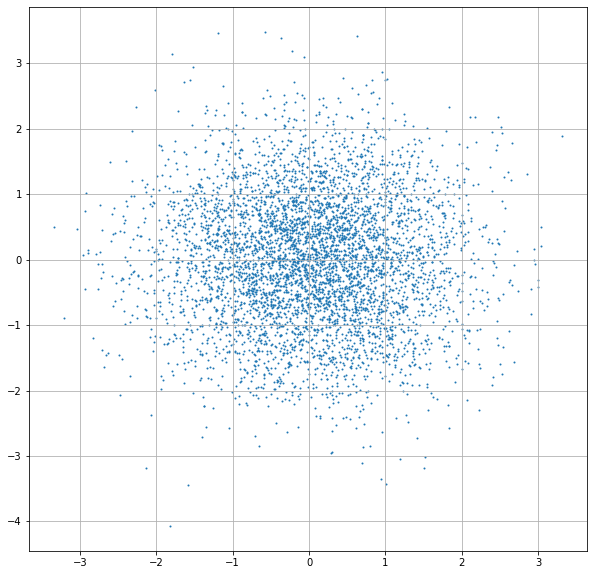

In [300]:
plt.figure(figsize=(10, 10))
plt.scatter(points_normal[:, 0], points_normal[:, 1], s=1)
plt.grid(True)

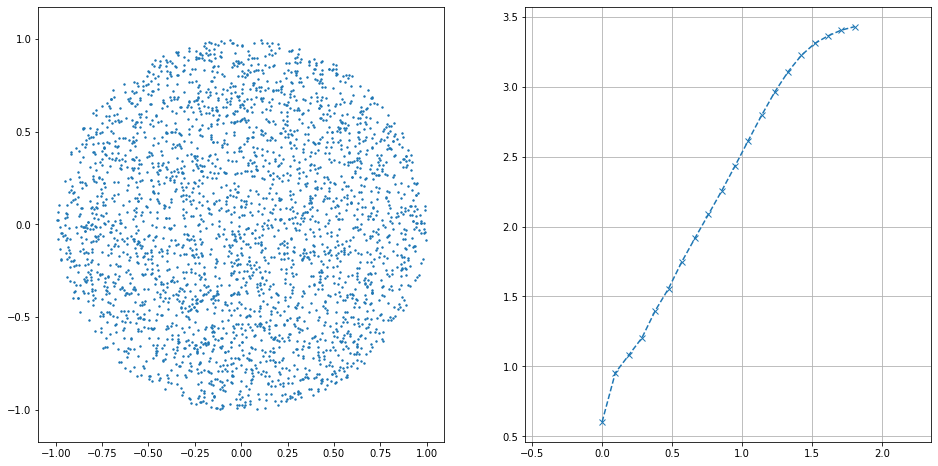

In [57]:
import numpy as np

N = 3000
phi = np.random.rand(N) * 2. * np.pi
m_points = np.multiply(np.tile(np.random.rand(N)**0.5, (2, 1)).transpose(), np.array([np.cos(phi), np.sin(phi)]).transpose())
eps = np.logspace(np.log10(1.), np.log10(1./2**6), 20)
counts = np.array([count_boxes(m_points, epsi) for epsi in eps])

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].scatter(m_points[:, 0], m_points[:, 1], s=2)
ax[1].plot(np.log10(1./eps), np.log10(counts), 'x--')
ax[1].axis('equal')
ax[0].axis('equal')
plt.grid(True)
plt.show()

In [70]:
counts

array([   4,    9,   12,   16,   25,   36,   56,   83,  122,  180,  271,
        412,  624,  920, 1282, 1679, 2039, 2309, 2539, 2687])

C:\Users\hoedtke\AppData\Local\Temp/ipykernel_27628/389891597.py:22: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(scales), np.log(r), 'o-')


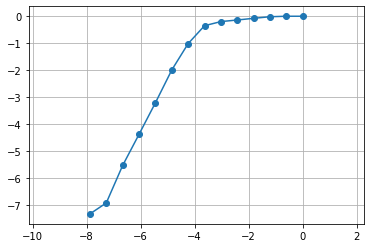

In [69]:
from scipy.spatial.distance import cdist

def f(eps, points, y):
    return np.min(cdist([y], points)) < eps
    

def MC(M, points, eps):
    # D = 2
    y = np.random.rand(M, 2)
    
    fvec = np.vectorize(lambda _x0, _x1: f(eps, points, np.asarray([_x0, _x1])))
    count = np.sum(fvec(y[:, 0], y[:, 1])) / M
    
    return count
    
    
scales = np.logspace(np.log10(1), np.log10(1e-5), 20)
MCvec = np.vectorize(lambda _e: MC(3000, m_points, _e))
r = MCvec(scales)

plt.figure()
plt.plot(np.log(scales), np.log(r), 'o-')
plt.axis('equal')
plt.grid(True)
plt.show()

In [46]:
# TEST OF RANDOM POINTS BOX COUNTING DIM

import numpy as np
import matplotlib.pyplot as plt


def stirling2(n, k):
    
    if k == 1:
        return 1
    
    if n == k:
        return 1
    
    if k == 0: # n != 0
        return 0
    
    return stirling2(n-1, k-1) + k * stirling2(n-1, k)


stirling2(14, 13)

91

In [47]:
M = 14
N = 30
n_iter = 10000

p_array = np.array([])
for i in range(n_iter):
    points = np.random.rand(N)
    bins = np.linspace(0, 1, M+1)
    counts, edges = np.histogram(points, bins=bins)
    
    p_array = np.append(p_array, np.sum(counts > 0))

    
m = 10
pm = np.sum(p_array == m) / n_iter
print("Experiment: pm = %.5f" % pm)

print("Avg: %.5f" % np.mean(p_array))

Experiment: pm = 0.02480
Avg: 12.49830


In [60]:
# theoretical
denominator = M**(N-1)

def pm_theory(m):
    return (fact(M-1, M-m) * stirling2(N, m)) / denominator

print("Theory: pm = %.5f" % pm_theory(m))

vpm_theory = np.vectorize(pm_theory)
m_array = np.arange(1, M+1)
mean = np.sum(m_array * vpm_theory(m_array))
print("Mean: %.5f" % mean)

Theory: pm = 0.02602
Mean: 12.48439


In [35]:
def fact(x, y):
    if x == y:
        return 1
    return x * fact(x-1, y)

fact(4, 2)

12

OverflowError: Python int too large to convert to C long